1.   Find the top 5 similar cars to toyota corona mark ii.
2.   Find Completely orthogonal car to toyota corona mark ii.
3.   Project the data to a 2 - dimensional space
4.   Write a function that returns dot products of 2 list of numbers
5.   Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers
6.   Create a class Vector that supports addition, dot product, and magnitude.
7.   Write a function that returns the L1 and L2 norms of a vector given as list

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv('/content/auto-mpg.csv')

#Find the top 5 similar cars to toyota corona mark ii.

In [13]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')


data= data.dropna(subset=['car name'])
data= data.fillna(data.median(numeric_only=True))

#data['car name'] = data['car name'].str.strip().str.lower()

numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin']
features = data[numeric_cols]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

target_name = "toyota corona mark ii"
target_index = data[data['car name'] == target_name].index[0]
target_vector = scaled_features[target_index]


dot_products = np.dot(scaled_features, target_vector)


data['similarity'] = dot_products
top_5_similar = data[data.index != target_index].sort_values(by='similarity', ascending=False).head(5)


print("Top 5 cars similar to 'Toyota Corona Mark II':")
print(top_5_similar[['car name', 'similarity']])

Top 5 cars similar to 'Toyota Corona Mark II':
               car name  similarity
54          datsun 1200    8.286011
18         datsun pl510    8.185868
53  toyota corolla 1200    8.078361
71      mazda rx2 coupe    7.795181
29         datsun pl510    7.745187


#Find Completely orthogonal car to toyota corona mark ii.

In [6]:
data['dot_product'] = dot_products

data_no_target = data[data.index != target_index]
orthogonal_car = data_no_target.iloc[(data_no_target['dot_product'] - 0).abs().argsort()[:1]]


print("Most orthogonal car to 'Toyota Corona Mark II':")
print(orthogonal_car[['car name', 'dot_product']])

Most orthogonal car to 'Toyota Corona Mark II':
                car name  dot_product
327  audi 5000s (diesel)    -0.008486


#Project the data to a 2 - dimensional space

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

                    car name      PCA1      PCA2
0  chevrolet chevelle malibu  2.743366 -0.953963
1          buick skylark 320  3.569887 -1.063818
2         plymouth satellite  3.061581 -1.172465
3              amc rebel sst  3.006883 -1.052208
4                ford torino  2.995942 -1.244821


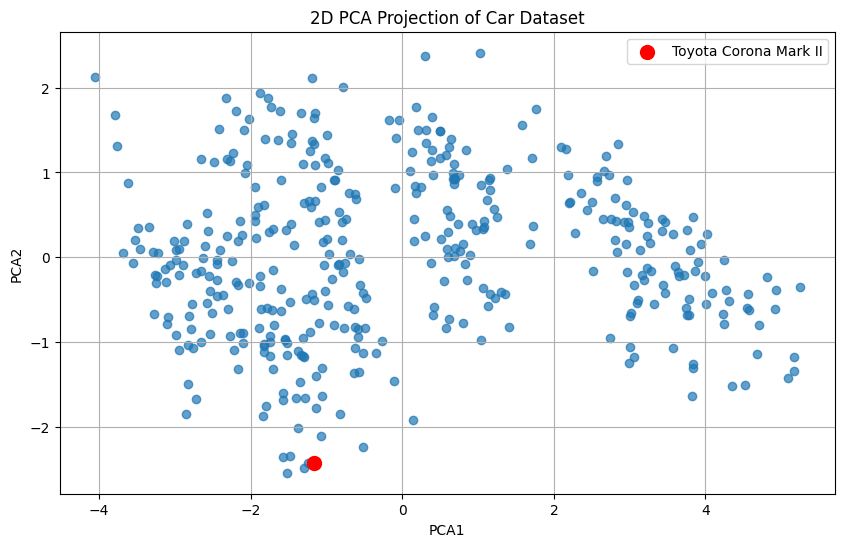

In [9]:
pca = PCA(n_components=2)
projected_2d = pca.fit_transform(scaled_features)


data['PCA1'] = projected_2d[:, 0]
data['PCA2'] = projected_2d[:, 1]


print(data[['car name', 'PCA1', 'PCA2']].head())


plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], alpha=0.7)


target = data[data['car name'] == 'toyota corona mark ii']
plt.scatter(target['PCA1'], target['PCA2'], color='red', label='Toyota Corona Mark II', s=100)

plt.title('2D PCA Projection of Car Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

#Write a function that returns dot products of 2 list of numbers

In [22]:
def dot_product(a,b):
  if len(a)!=len(b):
    print("Length of both lists are not same")
  else:
    return sum(a[i]*b[i] for i in range(len(a)))
# a=[1,2,3]
# b=[1,2,3]
a = [3, 4]
b = [1, 2]
dot_product(a,b)


11

#Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [25]:
def projection(a,b):
  dot_prod=sum(a[i]*b[i] for i in range(len(a)))
  b_squared=sum(b[i]**2  for i in range(len(b)))
  scalar=dot_prod/b_squared
  proj=[scalar*bi for bi in b]
  return proj
a = [3, 4]
b = [1, 2]
projection(a,b)

[2.2, 4.4]

# Create a class Vector that supports addition, dot product, and magnitude.

In [26]:
import math

In [31]:
class vector:
  def __init__(self,components):
    self.components=components
  def __add__(self,other):
    result=[a + b for a,b in zip(self.components,other.components)]
    return Vector(result)
  def dot(self, other):
    if len(self.components) != len(other.components):
      raise ValueError("Vectors must be the same length for dot product.")
    return sum(a * b for a, b in zip(self.components, other.components))

    def magnitude(self):
        return math.sqrt(sum(x ** 2 for x in self.components))

    def __repr__(self):
        return f"Vector({self.components})"

#Write a function that returns the L1 and L2 norms of a vector given as list

In [32]:
def vector_norms(v):
    l1 = sum(abs(x) for x in v)

    l2 = math.sqrt(sum(x**2 for x in v))

    return l1, l2